<a href="https://colab.research.google.com/github/Afag-Ramazanova/Explainable_AI_assignments/blob/main/Explainable_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages if not already present
!pip install torch torchvision matplotlib opencv-python
!pip install grad-cam



import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import requests
from io import BytesIO
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=0ed139d194fd4421db898aa24ecae10f4484737f414b641d65da118fc0d8457b
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


## 2. Load a Pretrained Model


In [ ]:
# Load pretrained ResNet-50
model = models.resnet50(pretrained=True)
model.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 96.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 3. Prepare the Dataset


For demonstration, use a few sample images from the web or your local files. If you have a dataset (e.g., from Kaggle’s Garbage Classification), load 5+ images representing different recycling categories.


In [ ]:
image_paths = [
"black-bottle.jpg",
"bottle.jpg",
"metal.jpg",
"plastic.jpg",
"trash.jpg"
]

In [ ]:
def load_image_local(path):
    img = Image.open(path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    return preprocess(img).unsqueeze(0), img

images = []
originals = []
for path in image_paths:
    img_tensor, orig_img = load_image_local(path)
    images.append(img_tensor)
    originals.append(orig_img)


## 4. Implement GradCAM, GradCAM+++, ScoreCAM

In [ ]:
import urllib

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = urllib.request.urlopen(url)
categories = [line.decode("utf-8").strip() for line in response.readlines()]


In [ ]:
# Get the predicted class index for each image
with torch.no_grad():
    outputs = model(img_tensor)
    class_idx = outputs.argmax(dim=1).item()  # For single image

# Use this class_idx in your GradCAM targets
targets = [ClassifierOutputTarget(class_idx)]


In [ ]:
def show_cam_on_image(img, mask, title=''):
    img = np.array(img) / 255.0
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    plt.imshow(cam)
    plt.title(title)
    plt.axis('off')
    plt.show()

Predicted class: beer bottle (index 440)
Model confidence (softmax): 0.4209


100%|██████████| 128/128 [07:10<00:00,  3.36s/it]


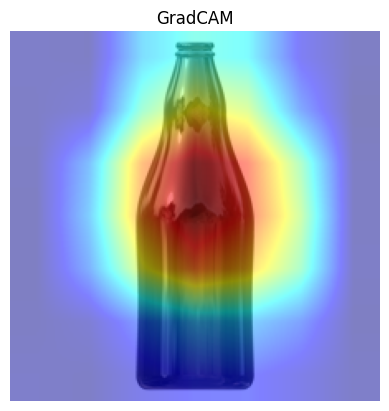

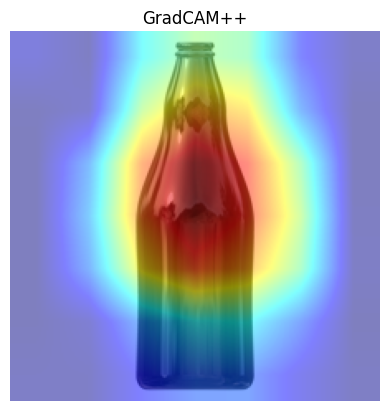

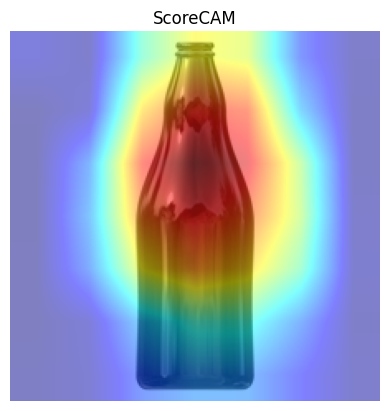

Predicted class: wine bottle (index 907)
Model confidence (softmax): 0.5948


100%|██████████| 128/128 [05:45<00:00,  2.70s/it]


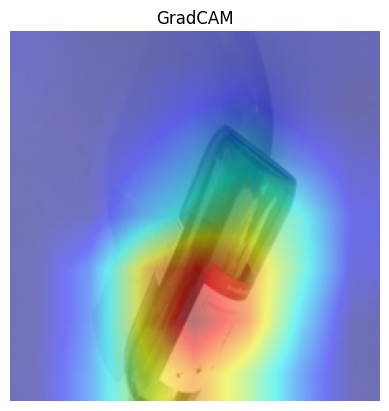

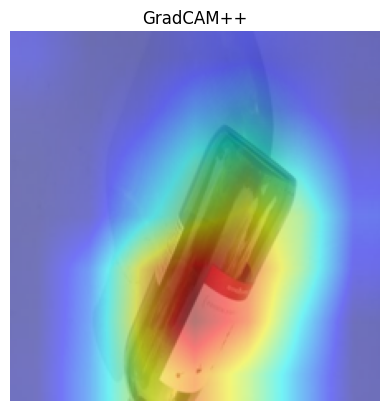

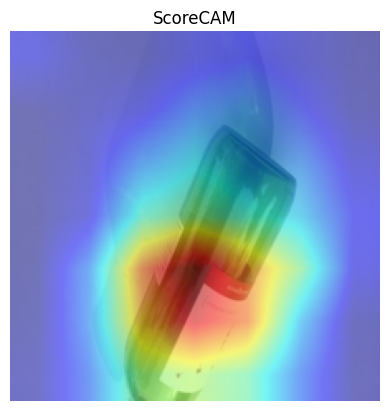

Predicted class: space heater (index 811)
Model confidence (softmax): 0.0931


100%|██████████| 128/128 [06:16<00:00,  2.94s/it]


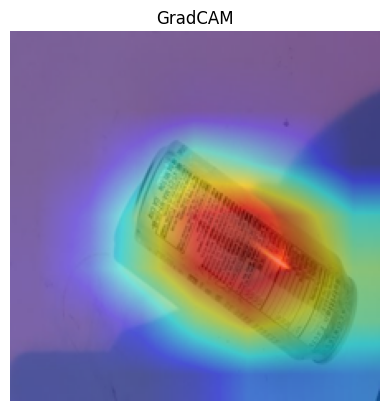

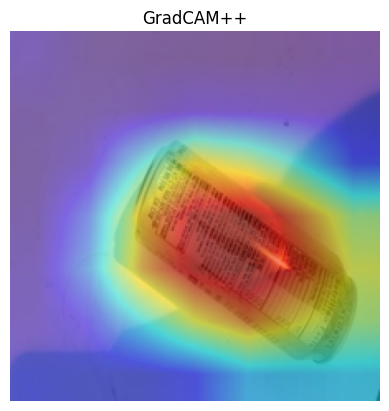

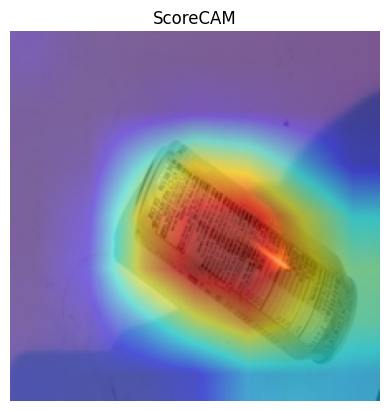

Predicted class: screwdriver (index 784)
Model confidence (softmax): 0.3806


100%|██████████| 128/128 [06:50<00:00,  3.21s/it]


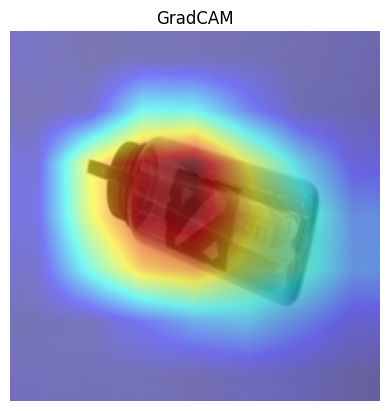

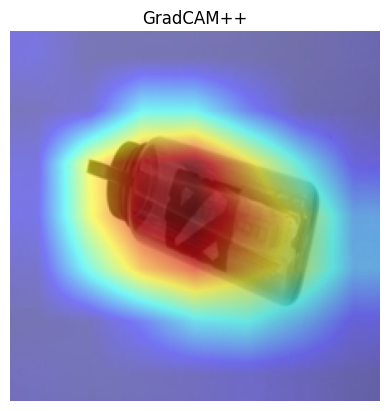

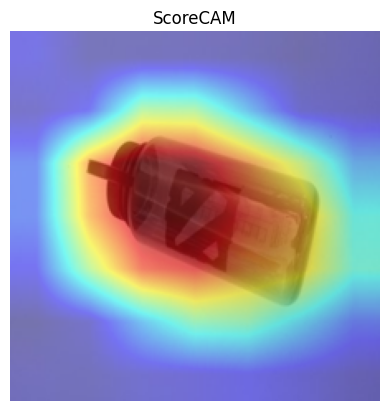

Predicted class: packet (index 692)
Model confidence (softmax): 0.2113


100%|██████████| 128/128 [06:16<00:00,  2.94s/it]


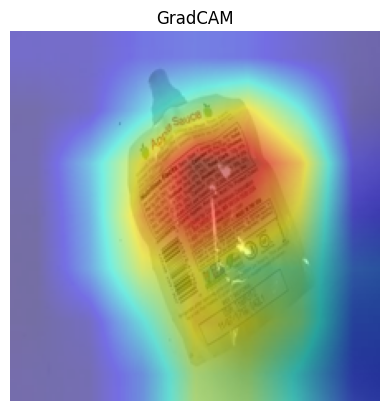

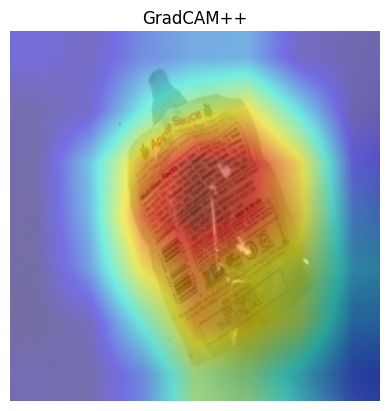

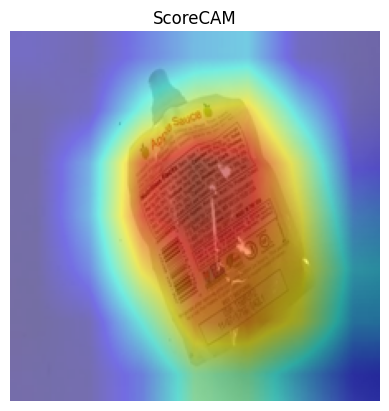

In [13]:
import torch.nn.functional as F
from PIL import Image
import numpy as np
import torch
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

target_layers = [model.layer4[-1]]  # For ResNet-50
cam = GradCAM(model=model, target_layers=target_layers)
cam_pp = GradCAMPlusPlus(model=model, target_layers=target_layers)
score_cam = ScoreCAM(model=model, target_layers=target_layers)

for img_tensor, orig_img in zip(images, originals):
  with torch.no_grad():
        outputs = model(img_tensor)
        class_idx = outputs.argmax(dim=1).item()
        scores = F.softmax(outputs, dim=1)
        confidence = scores[0, class_idx].item()
  predicted_label = categories[class_idx]
  print(f"Predicted class: {predicted_label} (index {class_idx})")
  print(f"Model confidence (softmax): {confidence:.4f}")
  targets = [ClassifierOutputTarget(class_idx)]

  # Generate CAMs (as before)
  grayscale_cam = cam(input_tensor=img_tensor, targets=targets)[0]
  grayscale_cam_pp = cam_pp(input_tensor=img_tensor, targets=targets)[0]
  grayscale_score_cam = score_cam(input_tensor=img_tensor, targets=targets)[0]

  orig_img_resized = orig_img.resize((224, 224))
  rgb_img = np.array(orig_img_resized) / 255.0

  visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
  visualization_pp = show_cam_on_image(rgb_img, grayscale_cam_pp, use_rgb=True)
  visualization_score = show_cam_on_image(rgb_img, grayscale_score_cam, use_rgb=True)

  plt.imshow(visualization)
  plt.title('GradCAM')
  plt.axis('off')
  plt.show()

  plt.imshow(visualization_pp)
  plt.title('GradCAM++')
  plt.axis('off')
  plt.show()

  plt.imshow(visualization_score)
  plt.title('ScoreCAM')
  plt.axis('off')
  plt.show()




## Reflection
*Perplexity used for making the reflection structured but reflection belongs to me.*

### **Context & Experimental Setup**

- **Explainability Methods:** GradCAM, GradCAM++, and ScoreCAM were used to generate attention heatmaps.
- **Images:** As input images https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification?select=one-indexed-files-notrash_val.txt data used, but model predictions are based on ImageNet categories (not specialized for recycling).
- **Outputs:** For each image, the predicted class, its softmax confidence, and three attention heatmaps are provided.

***

### **Analysis: Visual Cues & Prediction Behavior**

- For most images, the red/yellow areas in GradCAM maps are directly over the object—indicating the model is attending to the correct visual region, regardless of the predicted label.
- When the recycling object visually resembles an ImageNet class (e.g., "wine bottle" or "beer bottle"), both the prediction and the attention focus make sense.
- Model confidence varies, with noticeably lower confidence on misclassified items.
- The attention maps remain sharply centered even when the classification is incorrect, suggesting the model’s issue is not with focus, but with unfamiliar object types.

***

### **Misclassifications & Surprising Behavior**

- **Misclassifications occur** when a recycling object is not well represented among ImageNet classes (e.g.: a metal can predicted as "space heater," or a food wrapper as "packet").
- Lower confidence on these items (e.g., 9% for "space heater") indicates model uncertainty.
- All heatmap variants (GradCAM, GradCAM++, ScoreCAM) agree on the object’s visual focus, but this is not enough to correct a categorization error.

***

### **Why Explainability Matters in Recycling**

- **Transparency:** Visual explanations reveal if the model is reasoning based on the recycling item or on irrelevant background.
- **Debugging:** Identifies whether errors stem from attention/focus or from missing/disconnected label categories.
- **User Trust & Safety:** Crucial for real-world recycling automation—without interpretability, incorrect predictions could lead to sorting mistakes and inefficiencies.

***

### **Comparative Table**

| Image/File         | True Object     | Predicted Label      | Confidence | Heatmap Focus | Notes                         |
|--------------------|----------------|----------------------|------------|---------------|-------------------------------|
| 1. Wine Bottle     | Glass bottle   | Wine bottle          | 0.59       | High          | Correct, focused attention    |
| 2. Sippy Cup       | Plastic bottle | Screwdriver          | 0.38       | High          | Category mismatch             |
| 3. Beer Bottle     | Glass bottle   | Beer bottle          | 0.42       | Very High     | As expected                   |
| 4. Tin Can         | Metal can      | Space heater         | 0.09       | Good          | Wrong label, low confidence   |
| 5. Food Packet     | Plastic packet | Packet               | 0.21       | High          | Model hesitant, low conf.     |

***

### **Summary**

- The pretrained model "looks" at the correct part of the recycling image, but sometimes chooses an unexpected ImageNet category.
- **GradCAM visualizations are invaluable** for confirming focus, exposing misclassifications, and guiding future domain specific training or dataset curation for recycling applications.

***